In [48]:
import pandas as pd
from plotnine import *

In [49]:
%pwd

'/Users/yunkim/Desktop/dataitgirls/open-data-park'

In [50]:
%ls data

National city park standard data.csv


In [51]:
df = pd.read_csv('/Users/yunkim/Desktop/dataitgirls/open-data-park/data/National city park standard data.csv', encoding='euc-kr')
df.shape

(13135, 18)

In [52]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,Unnamed: 17
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,NaN,NaN,NaN,NaN,NaN,1995-12-27,강원도 양구군청,033-480-2927,2018-02-28,NaN
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,NaN,NaN,NaN,NaN,NaN,2009-09-25,강원도 양구군청,033-480-2927,2018-02-28,NaN
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,NaN,NaN,NaN,NaN,NaN,2010-03-19,강원도 양구군청,033-480-2460,2018-02-28,NaN
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,NaN,NaN,NaN,NaN,NaN,2010-10-01,강원도 양구군청,033-480-2576,2018-02-28,NaN


In [53]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         5898
소재지지번주소          1204
위도                  6
경도                  6
공원면적               27
공원보유시설(운동시설)     9579
공원보유시설(유희시설)     8418
공원보유시설(편익시설)     9672
공원보유시설(교양시설)    12382
공원보유시설(기타시설)    11040
지정고시일            1939
관리기관명             783
전화번호              925
데이터기준일자             0
Unnamed: 17     13135
dtype: int64

In [54]:
df.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 17'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 10 columns):
관리번호        13135 non-null object
공원명         13135 non-null object
공원구분        13135 non-null object
소재지도로명주소    7237 non-null object
소재지지번주소     11931 non-null object
위도          13129 non-null float64
경도          13129 non-null float64
공원면적        13108 non-null object
전화번호        12210 non-null object
데이터기준일자     13135 non-null object
dtypes: float64(2), object(8)
memory usage: 1.0+ MB


In [56]:
df['소재지도로명주소'].fillna(df['소재지지번주소'], inplace = True)

In [91]:
df['소재지도로명주소'].isnull().sum()

0

In [57]:
# 시도와 구군 데이터 가져오기
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0]
df['구군'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]

In [58]:
df.shape

(13135, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 12 columns):
관리번호        13135 non-null object
공원명         13135 non-null object
공원구분        13135 non-null object
소재지도로명주소    13135 non-null object
소재지지번주소     11931 non-null object
위도          13129 non-null float64
경도          13129 non-null float64
공원면적        13108 non-null object
전화번호        12210 non-null object
데이터기준일자     13135 non-null object
시도          13135 non-null object
구군          13135 non-null object
dtypes: float64(2), object(10)
memory usage: 1.2+ MB


In [60]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,시도,구군
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597,033-480-2927,2018-02-28,강원도,양구군
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498,033-480-2927,2018-02-28,강원도,양구군
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499,033-480-2927,2018-02-28,강원도,양구군
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437,033-480-2460,2018-02-28,강원도,양구군
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931,033-480-2576,2018-02-28,강원도,양구군


In [61]:
df.isnull().sum()

관리번호           0
공원명            0
공원구분           0
소재지도로명주소       0
소재지지번주소     1204
위도             6
경도             6
공원면적          27
전화번호         925
데이터기준일자        0
시도             0
구군             0
dtype: int64

In [ ]:
df.describe

In [62]:
# plotnine에 면적 표현용 데이터 만들기
df['공원면적'] = df['공원면적'].str.replace(',', '').astype(float)
df['공원면적그래프용'] = df['공원면적'].apply(lambda x : x * 0.0001)
df['공원면적그래프용'].head()

0     0.1597
1     0.1498
2     0.1499
3     1.8437
4    17.8931
Name: 공원면적그래프용, dtype: float64

/Users/yunkim/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


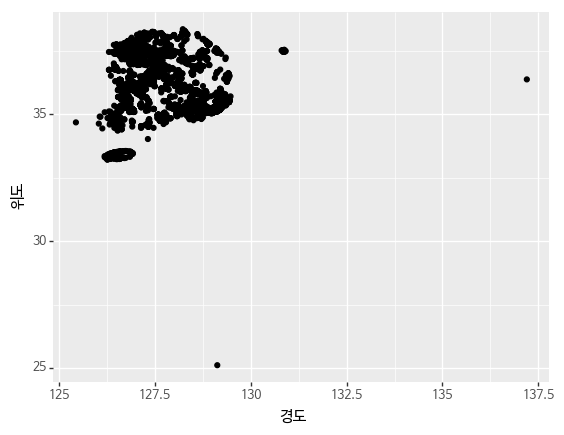

<ggplot: (7546681159)>

In [63]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [64]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 그래프 표현시 위경도가 NaN값이면 오류가 나니 제거해 줍니다. 
df_loc_notnull = df.loc[(df['위도'] > 32 ) & (df['경도'] < 132) & df['시도'].notnull()]
df_loc_notnull.shape

(13127, 13)

In [65]:
df = df.loc[(df['위도'] > 32 ) 
            & (df['경도'] < 132) 
            & df['시도'].notnull()]
df.shape

(13127, 13)

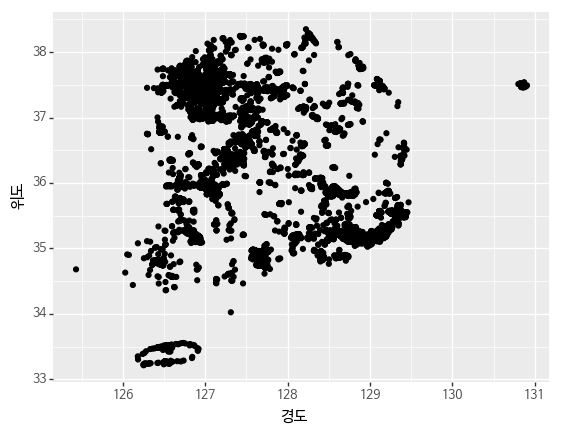

<ggplot: (-9223372029307898848)>

In [66]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(df)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

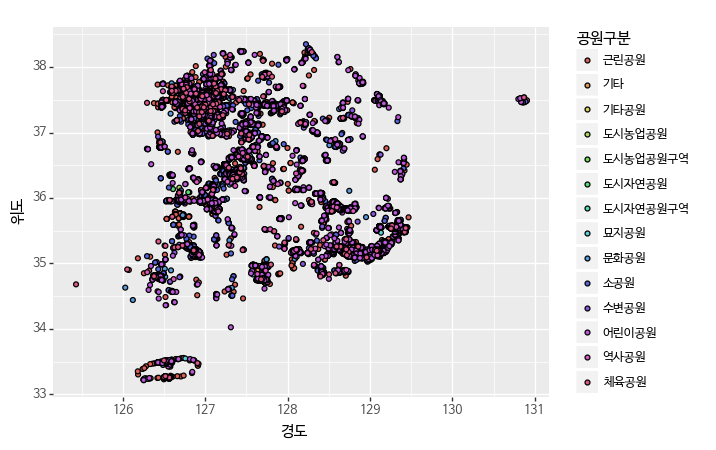

<ggplot: (-9223372029307688476)>

In [67]:
(ggplot(df)
 + aes(x='경도', y='위도', fill='공원구분')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [87]:
(ggplot(df)
 + aes(x='경도', y='위도', fill='공원구분', size='공원면적그래프용')
 + geom_point(alpha=0.5)
 + theme(text=element_text(family='NanumBarunGothic')
 + scale_fill_gradient(low = 'blue', high = 'green'))

SyntaxError: unexpected EOF while parsing (<ipython-input-87-82101c56c6b0>, line 5)

/Users/yunkim/anaconda3/lib/python3.6/site-packages/mizani/bounds.py:345: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/Users/yunkim/anaconda3/lib/python3.6/site-packages/mizani/bounds.py:345: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/Users/yunkim/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 27 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/yunkim/anaconda3/lib/python3.6/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


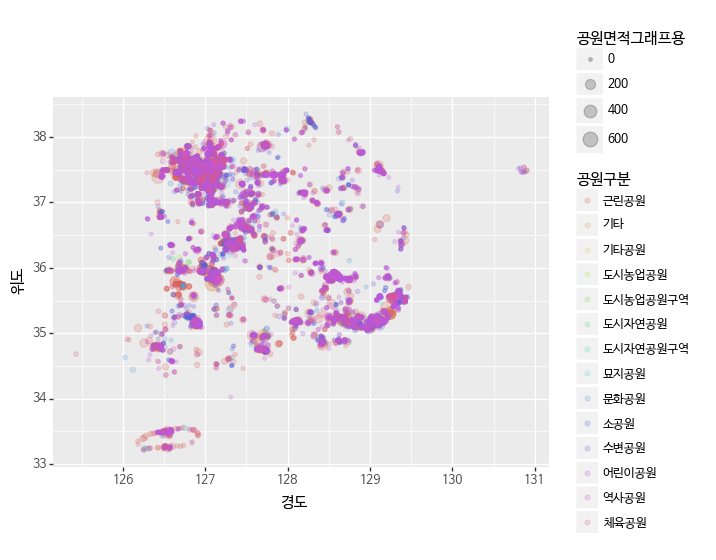

<ggplot: (-9223372029307085403)>

In [93]:
(ggplot(df)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적그래프용')
 + geom_point(alpha=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

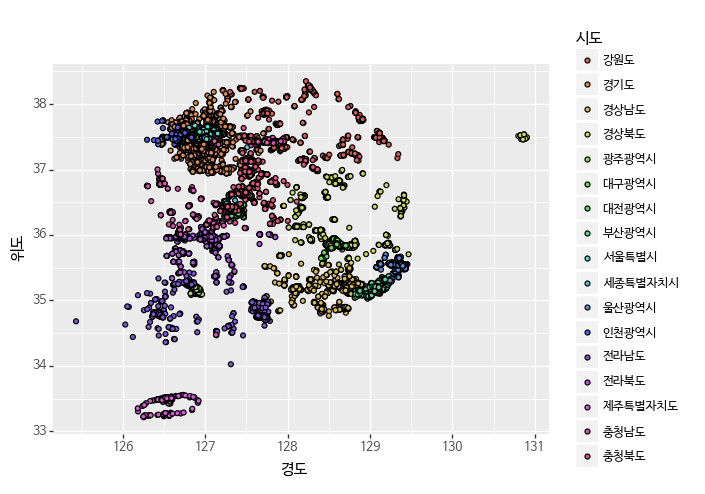

<ggplot: (7547714273)>

In [68]:
(ggplot(df)
 + aes(x='경도', y='위도', fill='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [69]:
seoul = df.loc[df['도로명주소'].str.startswith('서울')]
shop_except_seoul = df_shop.loc[~df_shop['도로명주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

KeyError: '도로명주소'

In [70]:
seoul = df.loc[(df['시도'].str.contains('서울'))]
seoul.shape

(1226, 13)

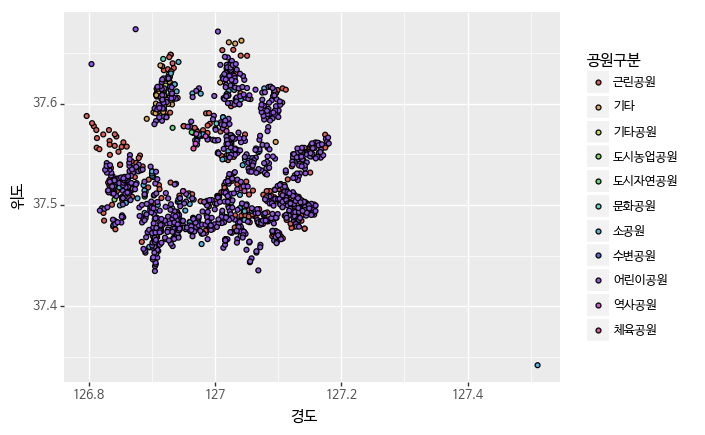

<ggplot: (7547173433)>

In [72]:
(ggplot(seoul)
 + aes(x='경도', y='위도', fill='공원구분')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

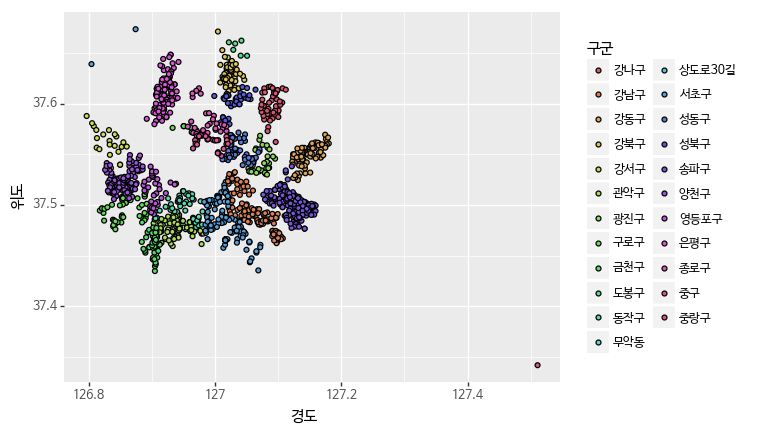

<ggplot: (7547291540)>

In [75]:
(ggplot(seoul)
 + aes(x='경도', y='위도', fill='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

/Users/yunkim/anaconda3/lib/python3.6/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


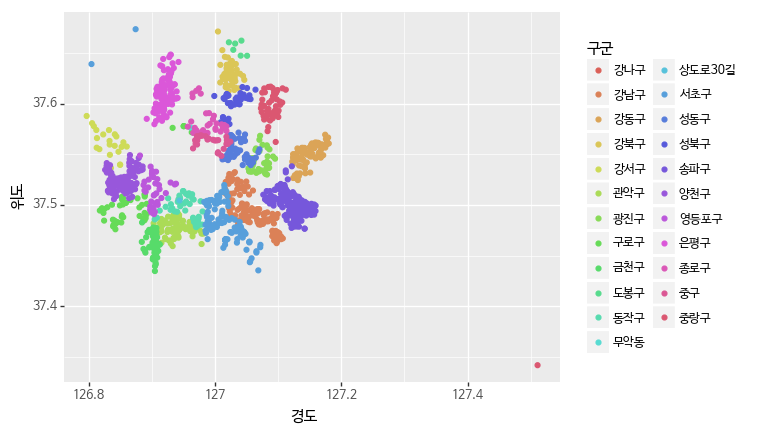

<ggplot: (7547176305)>

In [74]:
(ggplot(seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

/Users/yunkim/anaconda3/lib/python3.6/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


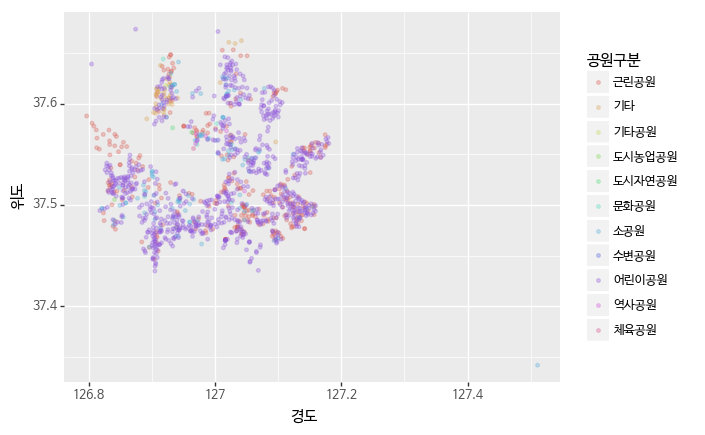

<ggplot: (7547176624)>

In [81]:
(ggplot(seoul)
 + aes(x='경도', y='위도', color='공원구분')
 + geom_point(alpha=0.3, size=1)
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

/Users/yunkim/anaconda3/lib/python3.6/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


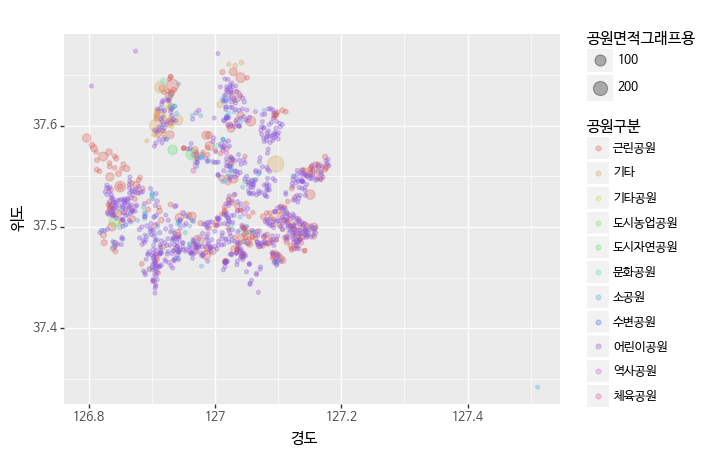

<ggplot: (-9223372029322270983)>

In [83]:
(ggplot(seoul)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적그래프용')
 + geom_point(alpha=0.3)
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [ ]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

In [73]:
# 특정지역의 일부 공원만 보기
df_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = gg.loc[gg['공원구분'].str.match(df_type)]

NameError: name 'gg' is not defined